## the notebook for curse by statistics stepic on 3 week

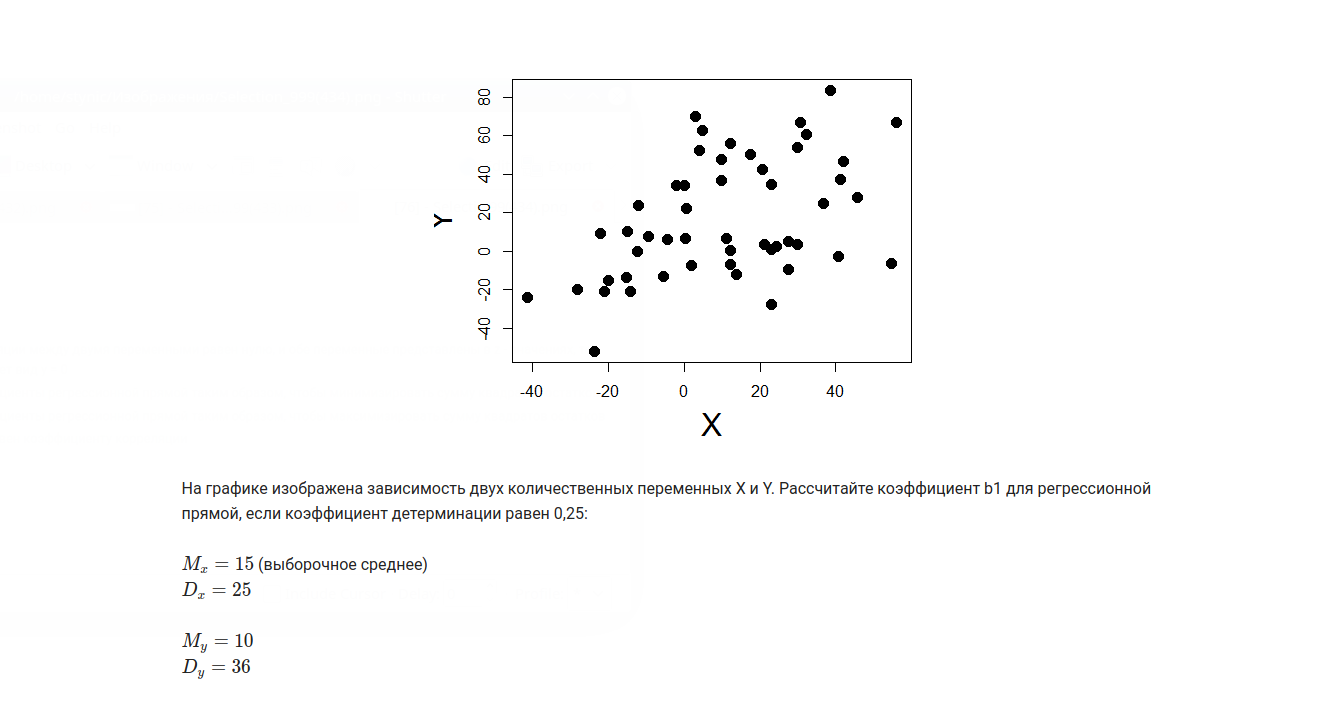

In [13]:
import numpy as np

meanx = 15
dx = 25
sdx = np.sqrt(dx)
print(f'AxisX\n\nmean: {meanx}\ndispersion: {dx}\nstatdart deviation: {sdx}\n')

meany = 10
dy = 36
sdy = np.sqrt(dy)
print(f'AxisY\n\nmean: {meany}\ndispersion: {dy}\nstatdart deviation: {sdy}\n')

rxy = 0.5
print(f'Coeff correlation {rxy}\n')

b1 = sdy/sdx * rxy
b0 = meany - b1 * meanx
print(f'Coeff b1(a1 or k): {b1}\nCoeff b0(a0, or b): {b0} ')


AxisX

mean: 15
dispersion: 25
statdart deviation: 5.0

AxisY

mean: 10
dispersion: 36
statdart deviation: 6.0

Coeff correlation 0.5

Coeff b1(a1 or k): 0.6
Coeff b0(a0, or b): 1.0 


In [17]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.graphics.factorplots import interaction_plot


df = pd.read_csv('atherosclerosis.csv', sep=',')
model = ols(formula='expr ~ age*dose', data=df).fit()
result = sm.stats.anova_lm(model, typ=2)
result

,sum_sq,df,F,PR(>F)
dose,16.912241,1.0,0.638094,0.427552
age,197.452754,1.0,7.449841,0.008313
age:dose,0.927077,1.0,0.034978,0.852272
Residual,1590.257424,60.0,NaN,NaN


In [21]:
df

,expr,age,dose
0,107.351478,1,D1
1,104.504438,1,D1
2,103.435134,1,D1
3,109.572882,1,D1
4,114.993803,1,D1
...,...,...,...
59,101.851582,2,D2
60,105.239530,2,D2
61,99.350198,2,D2
62,108.091455,2,D2


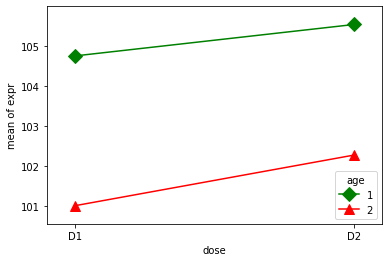

In [22]:
fig = interaction_plot(df.dose,
                       df.age,
                       df.expr,
                       colors=['green', 'red'],
                       markers=['D', '^'], ms=10)

In [203]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('http://d396qusza40orc.cloudfront.net/statistics/lec_resources/states.csv', sep=',')
data.head()

,state,metro_res,white,hs_grad,poverty,female_house
0,Alabama,55.4,71.3,79.9,14.6,14.2
1,Alaska,65.6,70.8,90.6,8.3,10.8
2,Arizona,88.2,87.7,83.8,13.3,11.1
3,Arkansas,52.5,81.0,80.9,18.0,12.1
4,California,94.4,77.5,81.1,12.8,12.6


In [204]:
X = data['hs_grad'].values
y = data['poverty'].values
E = np.ones(X.shape[0]).reshape(-1, 1)

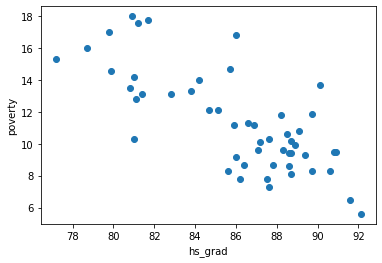

Coef corr pearson=-0.7468582531582508
Coef corr spearman=-0.6877405071424669
Coef corr kendall=-0.500395882324292


In [205]:
from scipy.stats import pearsonr, spearmanr, kendalltau
from scipy.stats import linregress

plt.scatter(X, y)
plt.xlabel('hs_grad')
plt.ylabel('poverty')
plt.show()
data[['hs_grad', 'poverty']].describe()
print(f'Coef corr pearson={pearsonr(X, y)[0]}')
print(f'Coef corr spearman={spearmanr(X, y)[0]}')
print(f'Coef corr kendall={kendalltau(X, y)[0]}')

In [206]:
X_concat = np.concatenate((E, X.reshape(-1, 1)), axis=1)
X_concat.shape

(51, 2)

In [207]:
w = np.linalg.inv(X_concat.T.dot(X_concat)).dot(X_concat.T).dot(y)
print(f'w={w}')
pre_y = (X_concat*w).sum(axis=1)

w=[64.78096577 -0.62121672]


In [208]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression().fit(X.reshape(-1, 1), y)
linear_model.coef_

array([-0.62121672])

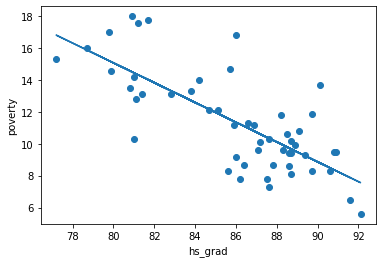

Coef corr pearson=-0.7468582531582508
Coef r2=-0.6212167177940106


In [209]:
plt.scatter(X, y)
plt.plot(X, pre_y)
plt.xlabel('hs_grad')
plt.ylabel('poverty')
plt.show()
data[['hs_grad', 'poverty']].describe()
print(f'Coef corr pearson={pearsonr(X, y)[0]}')
print(f'Coef r2={linregress(X, y)[0]}')

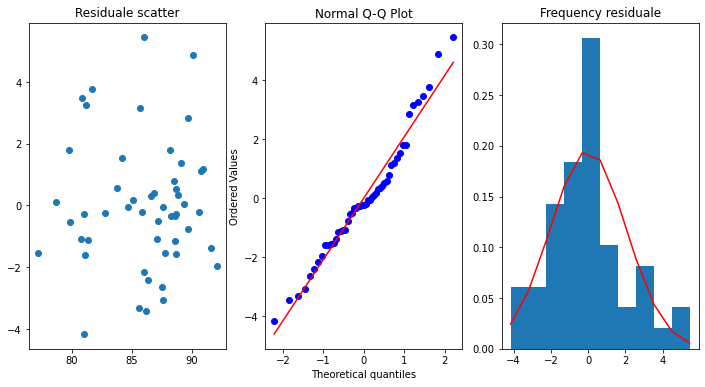

In [227]:
import scipy.stats as stats

e = y - pre_y
sigma = e.std()
mu = e.mean()
plt.rcParams['figure.figsize'] = [12, 6]
fig, (ax0, ax1, ax2) = plt.subplots(1, 3)
# scatter plot
ax0.set_title("Residuale scatter")
ax0.scatter(X, e)
# Q-Q Plot graph
stats.probplot(e, dist="norm", plot=ax1)
ax1.set_title("Normal Q-Q Plot")
# normal distribution histogram + distribution
ax2.set_title("Frequency residuale")
count, bins, _ = ax2.hist(e, density=True)
p_x = 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) )
ax2.plot(bins, p_x, color='r')

statsmodels:                              OLS Regression Results                            
Dep. Variable:                poverty   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     61.81
Date:                Wed, 23 Mar 2022   Prob (F-statistic):           3.11e-10
Time:                        12:52:35   Log-Likelihood:                -108.74
No. Observations:                  51   AIC:                             221.5
Df Residuals:                      49   BIC:                             225.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         64.7810      6.803      

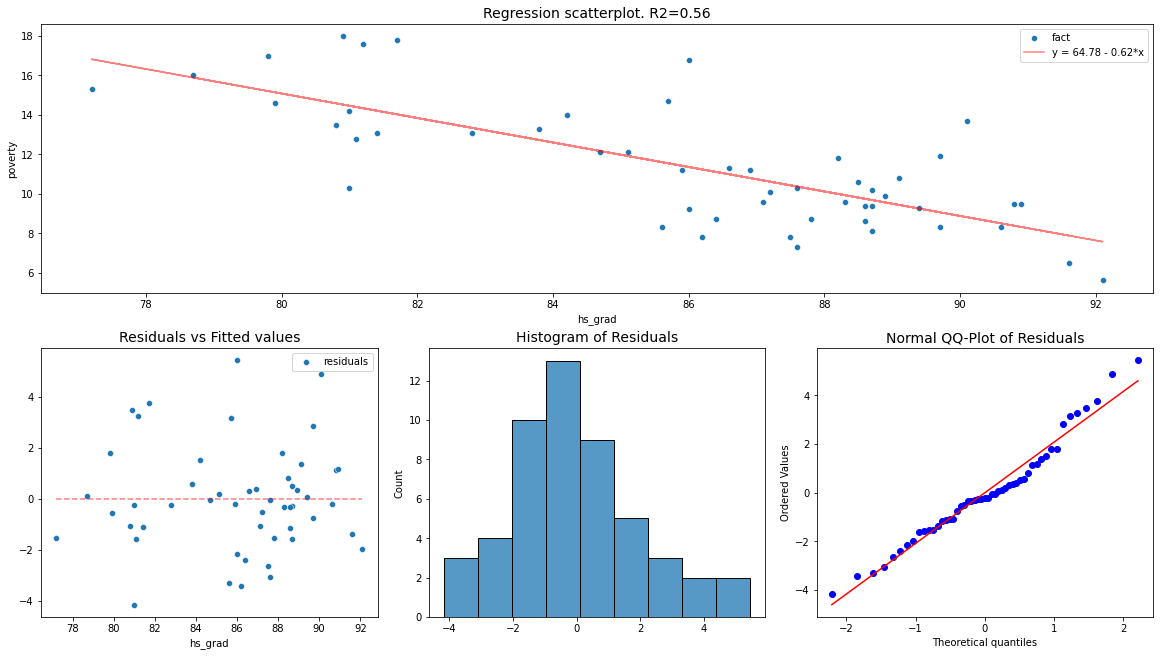

In [233]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

def calc_ols_statmodels(x, y):
    x_for_ols = sm.add_constant(x)
    model = sm.OLS(y, x_for_ols)
    results = model.fit()
    print('statsmodels: ', results.summary())
    
    # regression formula --------------------------------
    if results.params[1]>0:
        sign="+"
    else:
        sign="-"
    formula = f"y = {results.params[0]:.2f} {sign} {np.abs(results.params[1]):.2f}*x"
    print("-"*80)
    print("OLS Formula: ", formula)

    # Graphics ================================
    fig = plt.figure(figsize=(16,9), constrained_layout=True)
    gs = fig.add_gridspec(ncols=3, nrows=2)
    ax_main = fig.add_subplot(gs[0,:])
    ax_resid = fig.add_subplot(gs[1,0])
    ax_hist = fig.add_subplot(gs[1,1])
    ax_qqplot = fig.add_subplot(gs[1,2])

    # Scatterplot -----------------------------
    sns.scatterplot(x=x, y=y, ax=ax_main, label="fact")
    ax_main.plot(x, results.predict(), color='red', alpha=0.5, label = formula)
    ax_main.set_title(f"Regression scatterplot. R2={results.rsquared:.2f}", fontsize=14)
    ax_main.legend()

    # Residuals -------------------------------
    sns.scatterplot(x=x, y=results.resid, ax=ax_resid, label="residuals")
    ax_resid.hlines(0, x.min(), x.max(), linestyle='--', colors='red', alpha=0.5)
    ax_resid.set_title(f"Residuals vs Fitted values", fontsize=14)

    # Hist -------------------------------------
    sns.histplot(results.resid, ax=ax_hist,)
    ax_hist.set_title("Histogram of Residuals", fontsize=14)
    # ax_hist.legend()

    # QQ Plot ----------------------------------
    # sm.qqplot(results.resid, ax=ax_qqplot) # не такой секси
    stats.probplot(results.resid, dist="norm", plot=ax_qqplot)
    ax_qqplot.set_title("Normal QQ-Plot of Residuals", fontsize=14)

    plt.show()

# ==================================================    
# пример вызова процедуры
calc_ols_statmodels(data["hs_grad"],data["poverty"])    

In [244]:
from sympy import *
x = Symbol('x')
poverty = 64.78 - 0.62 * x
poverty

64.78 - 0.62*x

In [246]:
poverty.subs({x: 62})

26.3400000000000